In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
%matplotlib inline

## Task 1: Identify the Titanic dataset from the Seaborn library.

In [4]:
titanic = sbn.load_dataset('titanic')

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Task 2: Visualize the number of male and female passengers in the Titanic dataset.

Text(0.5, 1.0, 'Number of Male and Female Passengers in Titanic Dataset')

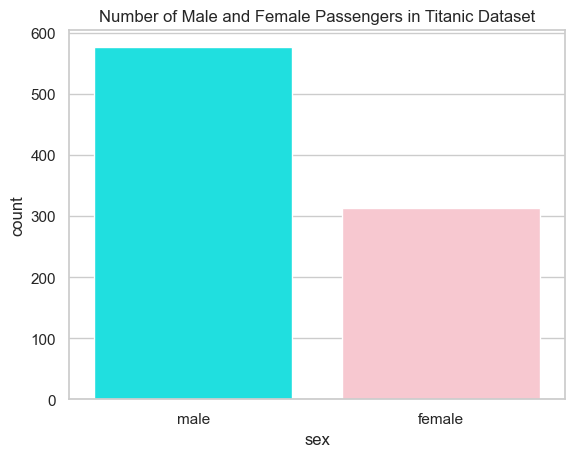

In [71]:
sbn.set(style="whitegrid")
sbn.countplot(titanic, x="sex", palette=["cyan", "pink"])
plt.title("Number of Male and Female Passengers in Titanic Dataset")

## Task 3: Draw the histogram of the 'age' variable

<Axes: xlabel='age', ylabel='Count'>

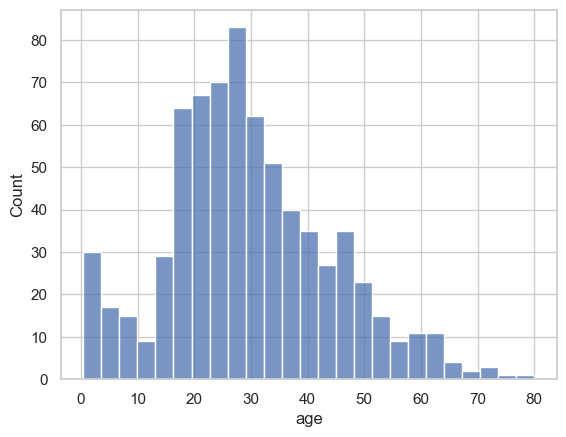

In [31]:
sbn.histplot(titanic, x="age",bins=25)

## Task 4: Visualize how many of each variable of the 'class' variable are.

In [228]:
class_counts = titanic["class"].value_counts()

In [229]:
class_counts

Third     491
First     216
Second    184
Name: class, dtype: int64

Text(0.5, 1.0, 'Distribution of Passenger Classes')

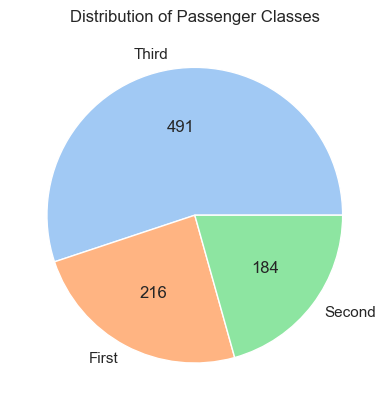

In [233]:
class_counts = titanic["class"].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(class_counts) / 100), colors=sbn.color_palette("pastel"))

plt.title("Distribution of Passenger Classes")

## Task 5: Visualize the survival status of individuals according to whether they are male or female.

<Axes: xlabel='sex', ylabel='count'>

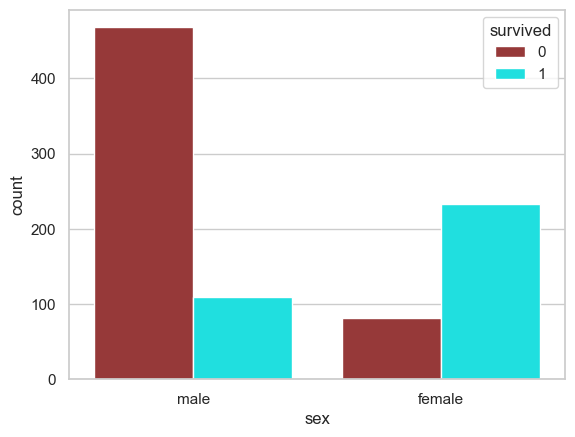

In [235]:
sbn.countplot(data=titanic, x="sex", hue="survived", palette=["brown","cyan"])

## Task 6: Visualize the survival status of individuals according to the variable 'alone'.

In [21]:
grouped_data = titanic.groupby("alone")["survived"].value_counts().unstack()

In [456]:
grouped_data

survived,0,1
alone,,
False,175,179
True,374,163


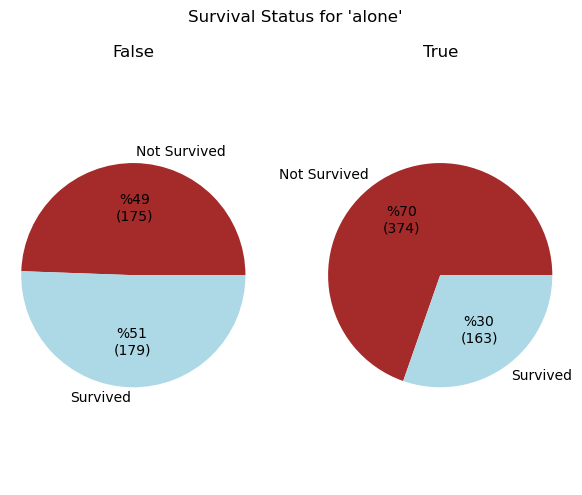

In [462]:

grouped_data = titanic.groupby("alone")["survived"].value_counts().unstack()


fig, axe = plt.subplots(1, len(grouped_data), figsize=(6, 5))

for i, (input_category, data) in enumerate(grouped_data.iterrows()):
    ax = axe[i]
    dataset = data.values
    labels = ["Not Survived", "Survived"]
    ax.pie(dataset, labels=labels, autopct=lambda pct: "%{:.0f}\n({})".format(pct, int(round((pct*(sum(dataset)/100)),2))) , colors=sbn.color_palette(["brown", "lightblue"]))
    ax.axis("equal")
    axe[i].set_title(input_category)

plt.suptitle("Survival Status for 'alone'")
plt.tight_layout()


## Task 7: Visualize the distribution of the 'fare' variable according to the age of the people.

<Axes: xlabel='age', ylabel='fare'>

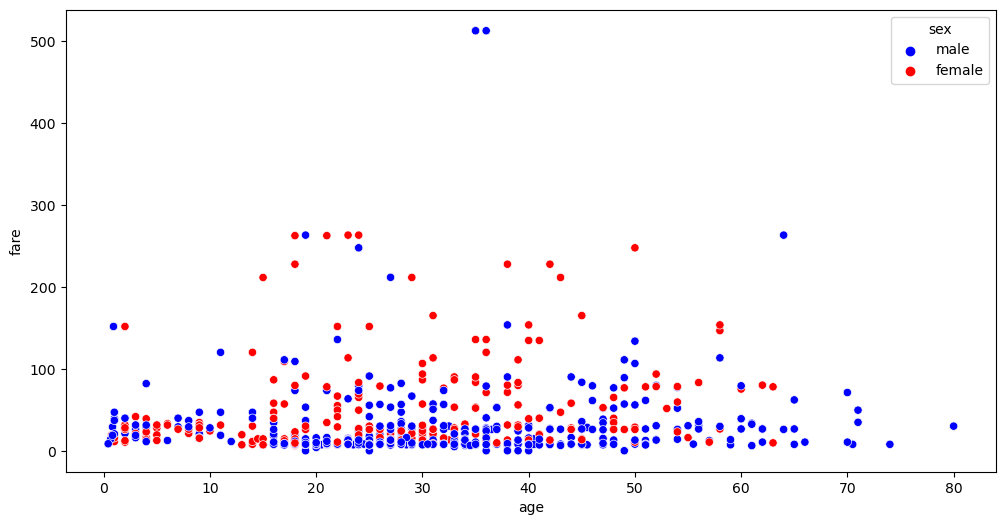

In [444]:
plt.figure(figsize=(12,6))
sbn.scatterplot(titanic, x="age", y="fare", hue="sex", palette=["blue", "red"])

## Task 8: Visualize the survival of men and women according to the variable 'embarked_town'.

In [7]:
theGroup = titanic.groupby(["sex", "embark_town"])["survived"]

In [8]:
df_8 = theGroup.value_counts().unstack()
df_8

survived              0    1
sex    embark_town          
female Cherbourg      9   64
       Queenstown     9   27
       Southampton   63  140
male   Cherbourg     66   29
       Queenstown    38    3
       Southampton  364   77

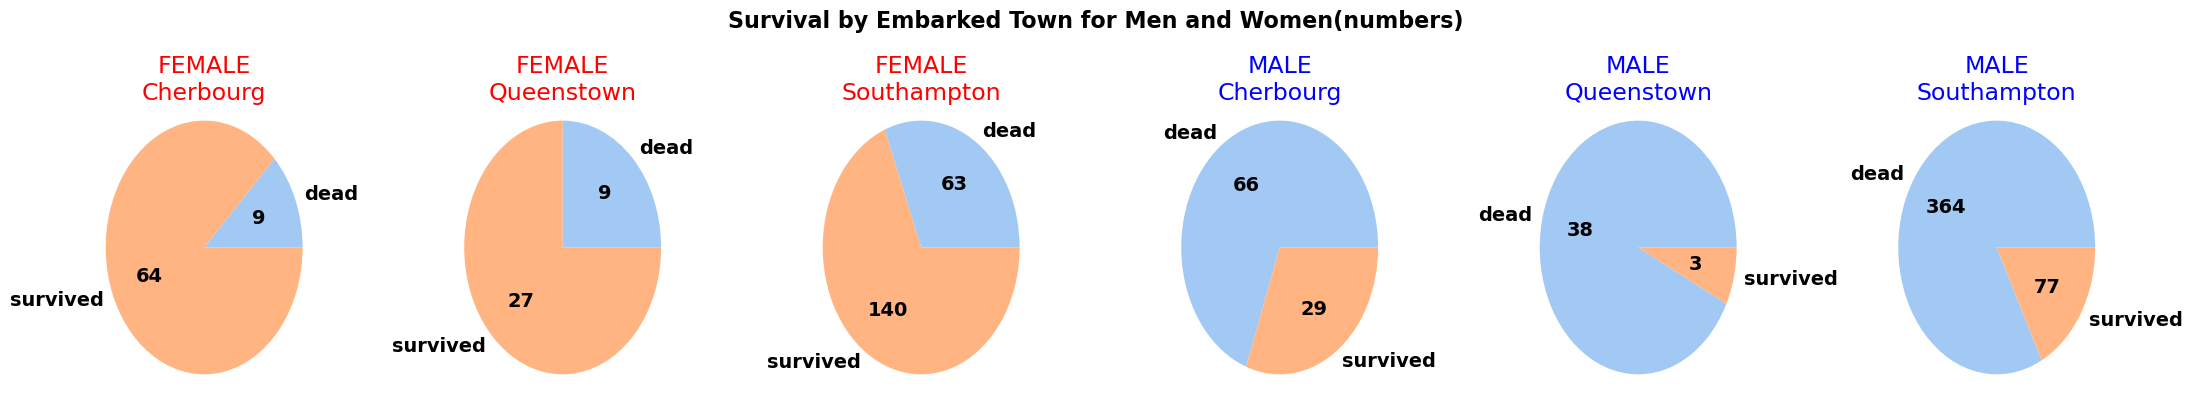

In [11]:
fig, axe = plt.subplots(1, len(df_8), figsize= (22,4))

for i,(input_category,data) in enumerate(df_8.iterrows()):
    ax = axe[i]
    dataset = data.values
    label = ["dead", "survived"]
    ax.pie(dataset, labels=label, autopct= lambda pct: "{:.0f}".format(round((pct*(sum(dataset)/100)),2)), colors=sbn.color_palette("pastel"),textprops={"fontsize":14, "fontweight":"bold"})
    ax.axis("auto")
    if (input_category[0] == "female"):
        axe[i].set_title(input_category[0].upper() +"\n"+ input_category[1].capitalize(), fontsize=17, color="red")
    else:
        axe[i].set_title(input_category[0].upper() +"\n"+ input_category[1].capitalize(), fontsize=17, color="blue")
    
plt.suptitle("Survival by Embarked Town for Men and Women(numbers)", fontsize=16, fontweight="bold")
plt.tight_layout()